# 1. Problem Definition: Predict whether the policy-holder(customer) will pay the next premium on time or not.

2. Hypothesis Generation:

*previous premium was paid or not.

*income

*age

*area type

*job->source

3. Data Extraction/collection:

provided in train and test csv files

4. Data Exploration and transformation:
    
    i. Reading the data.

In [1]:
#Importing all discussed file in the modules:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [2]:
df=pd.read_csv("C:/Users/lenovo/Desktop/internshala data science/train.csv")

In [3]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [4]:
df.shape

(79853, 12)

In [5]:
df.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

    ii. Variable Identification:
        *dependent variable-target
        *independent variable-perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late, 
        Count_6-12_months_late, Count_more_than_12_months_late, application_underwriting_score, no_of_premiums_paid, 
        sourcing_channel, residence_area_type

In [6]:
df.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

    dtypes:
        *categorical(object): sourcing_channel,residence_area_type
        *continuous(int or float): id, perc_premium_paid_by_cash_credit, age_in_days, Income, Count_3-6_months_late, 
        Count_6-12_months_late, Count_more_than_12_months_late, application_underwriting_score, no_of_premiums_paid, target


    iii. Univariate Analysis:

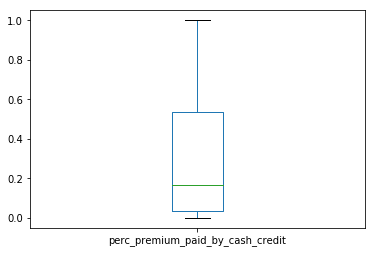

In [7]:
df['perc_premium_paid_by_cash_credit'].plot.box()

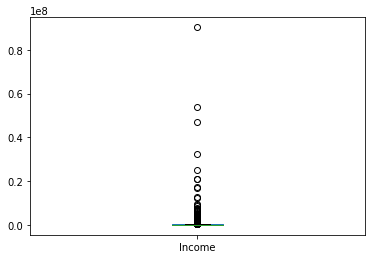

In [8]:
df['Income'].plot.box()

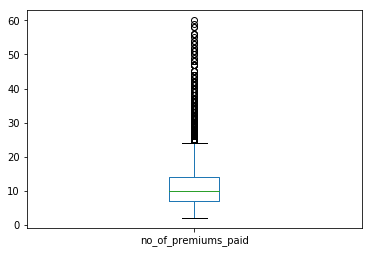

In [9]:
df['no_of_premiums_paid'].plot.box()

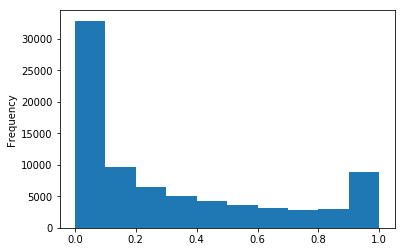

In [10]:
df['perc_premium_paid_by_cash_credit'].plot.hist()

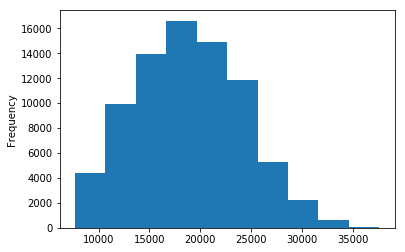

In [11]:
df['age_in_days'].plot.hist()

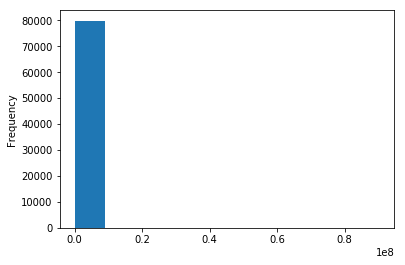

In [12]:
df['Income'].plot.hist()

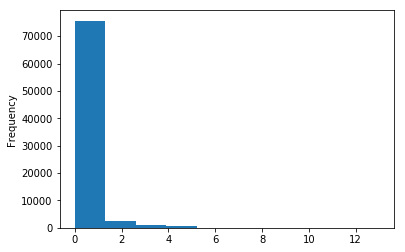

In [13]:
df['Count_3-6_months_late'].plot.hist()

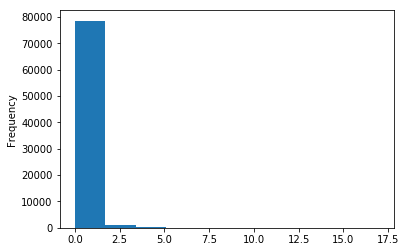

In [14]:
df['Count_6-12_months_late'].plot.hist()

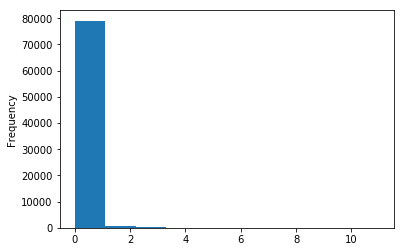

In [15]:
df['Count_more_than_12_months_late'].plot.hist()

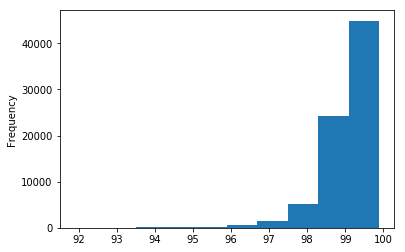

In [16]:
df['application_underwriting_score'].plot.hist()

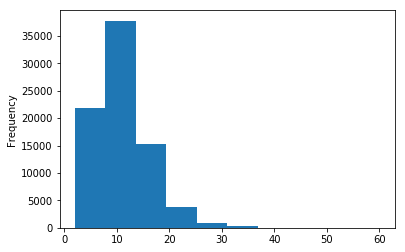

In [17]:
df['no_of_premiums_paid'].plot.hist()

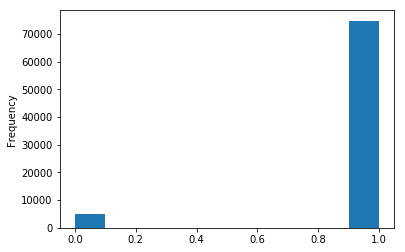

In [18]:
df['target'].plot.hist()

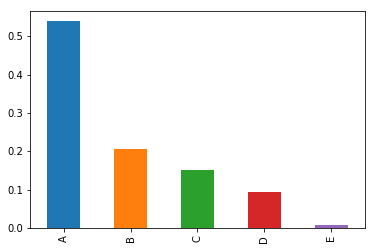

In [19]:
(df['sourcing_channel'].value_counts()/len(df['sourcing_channel'])).plot.bar()

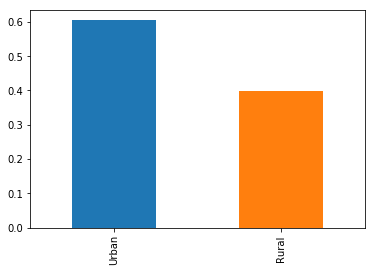

In [20]:
(df['residence_area_type'].value_counts()/len(df['sourcing_channel'])).plot.bar()

In [21]:
df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


    iv. Bi-variate Analysis:

In [22]:
df.corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
id,1.000000,-0.004833,0.005184,-0.001798,-0.005660,-0.002125,0.003424,-0.002124,-0.003328,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,-0.240980
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.058366,-0.072731,-0.059407,0.049888,0.176544,0.095103
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.016541
Count_3-6_months_late,-0.005660,0.214470,-0.058366,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,-0.248900
Count_6-12_months_late,-0.002125,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,-0.286159
Count_more_than_12_months_late,0.003424,0.168125,-0.059407,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,-0.240385
application_underwriting_score,-0.002124,-0.142670,0.049888,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,0.068715
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.022664
target,-0.005064,-0.240980,0.095103,0.016541,-0.248900,-0.286159,-0.240385,0.068715,0.022664,1.000000


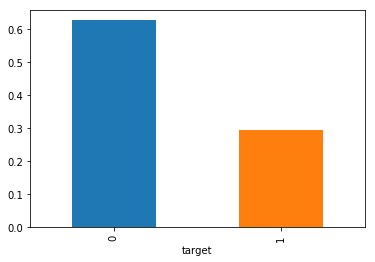

In [23]:
df.groupby('target')['perc_premium_paid_by_cash_credit'].mean().plot.bar()

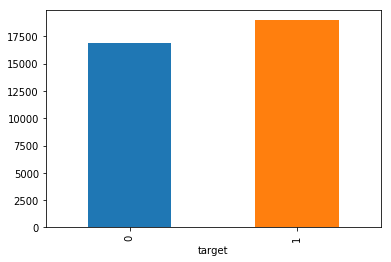

In [24]:
df.groupby('target')['age_in_days'].mean().plot.bar()

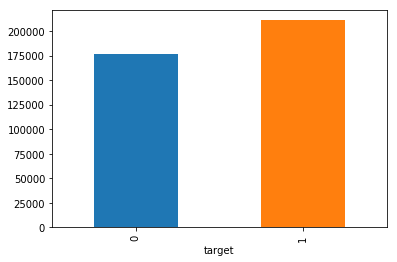

In [25]:
df.groupby('target')['Income'].mean().plot.bar()

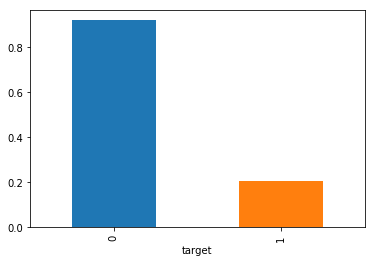

In [26]:
df.groupby('target')['Count_3-6_months_late'].mean().plot.bar()

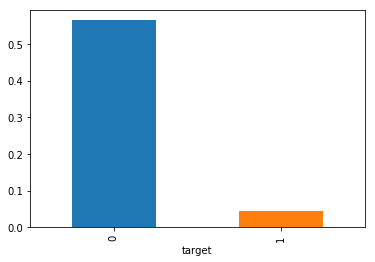

In [27]:
df.groupby('target')['Count_6-12_months_late'].mean().plot.bar()

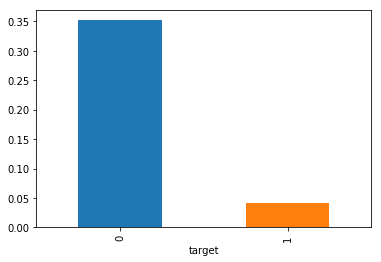

In [28]:
df.groupby('target')['Count_more_than_12_months_late'].mean().plot.bar()

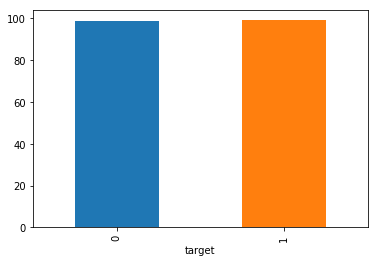

In [29]:
df.groupby('target')['application_underwriting_score'].mean().plot.bar()

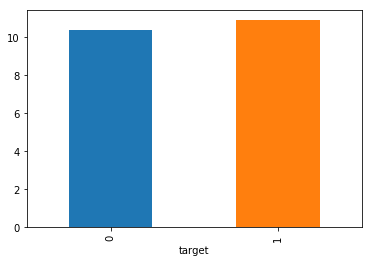

In [30]:
df.groupby('target')['no_of_premiums_paid'].mean().plot.bar()

In [31]:
pd.crosstab(df['target'],df['sourcing_channel'])

sourcing_channel,A,B,C,D,E
target,,,,,
0,2349,1066,903,634,46
1,40785,15446,11136,6925,563


In [32]:
pd.crosstab(df['target'],df['residence_area_type'])

residence_area_type,Rural,Urban
target,,
0,1998,3000
1,29672,45183


    v. Missing Value Treatment:

In [33]:
df.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [34]:
df.dropna(inplace=False).corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
id,1.000000,-0.004941,0.005042,0.001444,-0.005219,-0.002744,0.003449,-0.002090,-0.002498,-0.005710
perc_premium_paid_by_cash_credit,-0.004941,1.000000,-0.251351,-0.037197,0.219576,0.212087,0.170492,-0.143459,-0.148847,-0.236109
age_in_days,0.005042,-0.251351,1.000000,0.036494,-0.057211,-0.069481,-0.059649,0.050114,0.184070,0.092427
Income,0.001444,-0.037197,0.036494,1.000000,-0.000898,-0.022208,-0.016319,0.085879,0.104384,0.020045
Count_3-6_months_late,-0.005219,0.219576,-0.057211,-0.000898,1.000000,0.210423,0.294566,-0.082781,0.067843,-0.251305
Count_6-12_months_late,-0.002744,0.212087,-0.069481,-0.022208,0.210423,1.000000,0.274262,0.004785,-0.091193,-0.289165
Count_more_than_12_months_late,0.003449,0.170492,-0.059649,-0.016319,0.294566,0.274262,1.000000,-0.031726,-0.026716,-0.241386
application_underwriting_score,-0.002090,-0.143459,0.050114,0.085879,-0.082781,0.004785,-0.031726,1.000000,-0.270472,0.069799
no_of_premiums_paid,-0.002498,-0.148847,0.184070,0.104384,0.067843,-0.091193,-0.026716,-0.270472,1.000000,0.018320
target,-0.005710,-0.236109,0.092427,0.020045,-0.251305,-0.289165,-0.241386,0.069799,0.018320,1.000000


In [35]:
df.corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
id,1.000000,-0.004833,0.005184,-0.001798,-0.005660,-0.002125,0.003424,-0.002124,-0.003328,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,-0.240980
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.058366,-0.072731,-0.059407,0.049888,0.176544,0.095103
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.016541
Count_3-6_months_late,-0.005660,0.214470,-0.058366,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,-0.248900
Count_6-12_months_late,-0.002125,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,-0.286159
Count_more_than_12_months_late,0.003424,0.168125,-0.059407,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,-0.240385
application_underwriting_score,-0.002124,-0.142670,0.049888,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,0.068715
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.022664
target,-0.005064,-0.240980,0.095103,0.016541,-0.248900,-0.286159,-0.240385,0.068715,0.022664,1.000000


    Dropping doesn't seems good.

In [36]:
df['target'].corr(df['application_underwriting_score'].fillna(df['application_underwriting_score'].median(),inplace=False))

0.0671452682364992

In [37]:
#Great drop, not feasible
df['target'].corr(df['application_underwriting_score'].fillna(0,inplace=False))

0.006384108490935415

In [38]:
df['target'].corr(df['application_underwriting_score'].fillna(df['application_underwriting_score'].mean(),inplace=False))
# mean() give good correlation

0.06733262862572342

In [39]:
# Since categorical variables, therefore mode is to be taken
df['Count_3-6_months_late'].value_counts()

0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
6.0        68
7.0        23
8.0        15
9.0         4
11.0        1
12.0        1
13.0        1
10.0        1
Name: Count_3-6_months_late, dtype: int64

In [40]:
def null(df):
    df['application_underwriting_score'].fillna(df['application_underwriting_score'].mean(),inplace=True)
    df['Count_3-6_months_late'].fillna(0,inplace=True)
    df['Count_6-12_months_late'].fillna(0,inplace=True)
    df['Count_more_than_12_months_late'].fillna(0,inplace=True)
    return df

In [41]:
null(df)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.020000,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.890000,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.690000,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.570000,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.870000,12,B,Urban,1
5,59951,0.540,17527,282080,2.0,0.0,0.0,99.180000,9,B,Rural,1
6,54031,1.000,24829,118400,0.0,0.0,0.0,99.050000,11,B,Urban,1
7,94290,1.000,21911,180240,1.0,6.0,4.0,99.330000,3,A,Urban,0
8,93730,0.621,9868,92520,0.0,0.0,0.0,99.580000,4,A,Urban,1
9,84844,0.908,23008,107180,2.0,0.0,0.0,98.910000,11,A,Rural,0


In [42]:
df.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

    vi. Outlier Treatment:

    vii. Transformation:
   

In [43]:
# While going through the module of implementation of k-mean, from sklearn.preprocessing import StandardScaler and function fit_transform, googling it to know more, came across LabelEncoder and was mentioned in the module. 
def transform(df):
    df["sourcing_channel"]=label.fit_transform(df['sourcing_channel'])
    df["residence_area_type"]=label.fit_transform(df['residence_area_type'])
    return df

In [44]:
transform(df)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.020000,13,2,1,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.890000,21,0,1,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.690000,7,2,0,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.570000,9,0,1,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.870000,12,1,1,1
5,59951,0.540,17527,282080,2.0,0.0,0.0,99.180000,9,1,0,1
6,54031,1.000,24829,118400,0.0,0.0,0.0,99.050000,11,1,1,1
7,94290,1.000,21911,180240,1.0,6.0,4.0,99.330000,3,0,1,0
8,93730,0.621,9868,92520,0.0,0.0,0.0,99.580000,4,0,1,1
9,84844,0.908,23008,107180,2.0,0.0,0.0,98.910000,11,0,0,0


In [45]:
df=pd.get_dummies(df)

    5. Predictive Modeling:

(i) Logistic Regression:

In [46]:
train,test=train_test_split(df,test_size=0.2,random_state=112)

In [47]:
x_train=train.drop('target',axis=1)
y_train=train['target']
x_test=test.drop('target',axis=1)
y_test=test['target']
x_train1=scaler.fit_transform(x_train)
x_test1=scaler.fit_transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [48]:
logreg.fit(x_train1,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
logreg.score(x_train1,y_train)

0.938730784884631

In [50]:
logreg.score(x_test1,y_test)

0.9425208189844092

(ii) Decision Tree:

In [51]:
x=df.drop('target',axis=1)
y=df['target']

In [52]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=101,stratify=y)

In [53]:
train_x1=scaler.fit_transform(train_x)
test_x1=scaler.fit_transform(test_x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [54]:
train_y.value_counts()/len(train_y)

1    0.937418
0    0.062582
Name: target, dtype: float64

In [55]:
test_y.value_counts()/len(test_y)

1    0.937387
0    0.062613
Name: target, dtype: float64

In [56]:
dtc.fit(train_x1,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
dtc.score(train_x1,train_y)

1.0

In [58]:
dtc.score(test_x1,test_y)

0.892105790422761

In [59]:
dtc.predict(test_x1)

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

    6. Model Deployment/ Implementation:

In [60]:
test=pd.read_csv('C:/Users/lenovo/Desktop/internshala data science/test.csv')

In [61]:
transform(test)
null(test)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.890000,7,0,0
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.930000,19,0,1
2,70762,1.000,17170,186030,0.0,0.0,0.0,99.061898,2,1,1
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.000000,11,1,0
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.170000,14,0,0
5,64797,0.112,16065,245130,0.0,0.0,0.0,98.880000,7,1,0
6,67412,0.325,17167,388050,6.0,0.0,0.0,99.000000,27,2,1
7,44241,0.362,20085,99880,3.0,0.0,0.0,98.400000,14,0,1
8,5069,0.115,23008,360040,0.0,0.0,0.0,99.880000,6,3,0
9,16615,0.021,21906,510040,0.0,0.0,0.0,99.890000,11,1,1


In [62]:
test=pd.get_dummies(test)

In [63]:
test1=scaler.fit_transform(test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [64]:
pred_dtc=dtc.predict_proba(test1)

In [65]:
pred_logreg=logreg.predict_proba(test1)

In [66]:
df1=pd.read_csv('C:/Users/lenovo/Desktop/internshala data science/test.csv')
dict={'id':df1['id'],'target':pred_logreg[:,-1]}
df2=pd.DataFrame(dict)
df2.to_csv('C:/Users/lenovo/Desktop/internshala data science/test_logreg.csv',index=False)
#After comparing, logistic regression is providing more accuracy than decision tree